# Data Pre-processing

#### In this notebook we perform the following data cleaning process:
 - 1. Filter the df with only rows where we have the corresponding MRI
 - 2. Remove any rows that don't have both an ADAS11 and MMSE score 
 - 3. Drop all columns corresponding to a cognitive score
 - 4. Drop all columns not present during baseline
 - 5. Correct the TAU/ABETA columns (contain strings like >1700) and transform to float
 - 6. Drop all columns with extensive NaNs and impute remaining NaNs 
 - 7. Change Datatypes to approprate type
 - 8. One Hot Encode the categorical columns

In [2]:
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

In [3]:
from prep_pipeline import *
from CogDataset3d import *

In [6]:
data = pd.read_csv('../brainlabs_prep/data/ADNIMERGE.csv', low_memory=False)

In [7]:
data.head(5)

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.30,Male,...,NaN,NaN,1.37,nan,nan,0.00,0.00,0,0.00,2021-02-06 04:52:41.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.30,Male,...,239.7,22.83,1.08,nan,nan,0.00,0.00,0,0.00,2021-02-06 04:52:41.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.30,Male,...,239.7,22.83,1.08,nan,nan,0.50,5.97,6,6.00,2021-02-06 04:52:41.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.30,Male,...,239.7,22.83,1.08,nan,nan,1.00,11.97,12,12.00,2021-02-06 04:52:41.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.30,Male,...,239.7,22.83,1.08,nan,nan,2.00,23.93,24,24.00,2021-02-06 04:52:41.0


In [8]:
all_files = os.listdir('../brainlabs_prep/data/input_files')

In [9]:
pipe_prep = Pipeline([('FilesWithMRI', FilesWithMRI(all_files)),
                      ('Remove NaN ADAS11 rows', RemoveNanRows(['ADAS11'])),
                      ('Remove NaN MMSE rows', RemoveNanRows(['MMSE'])),
                      ('Drop Cognitive Columns', DropRowsCog()),
                      ('Drop Non-Baseline Columns', DropNotBaseline()),
                      ('Correct TAU/ABETA', CorrectUniqueCat()),
                      ('Filter Extensive NaNs/Impute', CorrectNaNs()),
                      ('Change Data Types', ChangeDTypes()),
                      ('OneHotEncoder', OneHotEncode())
                     ])

df = pipe_prep.fit_transform(data.copy())

In [10]:
df.filenames

0       sub-ADNI100S0006_ses-M06_T1w
1       sub-ADNI100S0006_ses-M12_T1w
2       sub-ADNI100S0006_ses-M18_T1w
3       sub-ADNI100S0006_ses-M36_T1w
4       sub-ADNI100S0015_ses-M12_T1w
                    ...             
1643    sub-ADNI068S4431_ses-M84_T1w
1644    sub-ADNI018S2133_ses-M96_T1w
1645    sub-ADNI116S4855_ses-M72_T1w
1646    sub-ADNI011S4278_ses-M84_T1w
1647    sub-ADNI051S5285_ses-M48_T1w
Name: filenames, Length: 1643, dtype: object

In [11]:
df.columns

Index(['AGE', 'PTEDUCAT', 'APOE4', 'ADAS11', 'MMSE', 'ABETA_bl', 'TAU_bl',
       'PTAU_bl', 'M', 'filenames', 'DX_bl_AD', 'DX_bl_CN', 'DX_bl_EMCI',
       'DX_bl_LMCI', 'DX_bl_SMC', 'DX_bl_nan', 'PTGENDER_Female',
       'PTGENDER_Male', 'PTGENDER_nan', 'PTMARRY_Divorced', 'PTMARRY_Married',
       'PTMARRY_Never married', 'PTMARRY_Unknown', 'PTMARRY_Widowed',
       'PTMARRY_nan'],
      dtype='object')

In [12]:
df = df.drop(columns=['PTMARRY_Unknown', 'PTMARRY_Widowed',
       'PTMARRY_nan','DX_bl_nan'])

In [13]:
df

,AGE,PTEDUCAT,APOE4,ADAS11,MMSE,ABETA_bl,TAU_bl,PTAU_bl,M,filenames,...,DX_bl_CN,DX_bl_EMCI,DX_bl_LMCI,DX_bl_SMC,PTGENDER_Female,PTGENDER_Male,PTGENDER_nan,PTMARRY_Divorced,PTMARRY_Married,PTMARRY_Never married
0,80.40,13,0.00,19.00,21,1002.24,286.52,27.66,6,sub-ADNI100S0006_ses-M06_T1w,...,0,0,1,0,1,0,0,0,1,0
1,80.40,13,0.00,18.67,26,1002.24,286.52,27.66,12,sub-ADNI100S0006_ses-M12_T1w,...,0,0,1,0,1,0,0,0,1,0
2,80.40,13,0.00,11.33,24,1002.24,286.52,27.66,18,sub-ADNI100S0006_ses-M18_T1w,...,0,0,1,0,1,0,0,0,1,0
3,80.40,13,0.00,17.67,22,1002.24,286.52,27.66,36,sub-ADNI100S0006_ses-M36_T1w,...,0,0,1,0,1,0,0,0,1,0
4,80.80,18,1.00,6.67,27,1002.24,286.52,27.66,12,sub-ADNI100S0015_ses-M12_T1w,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,74.10,16,0.00,13.33,27,618.50,158.20,14.89,84,sub-ADNI068S4431_ses-M84_T1w,...,0,1,0,0,0,1,0,0,1,0
1644,62.50,18,2.00,35.67,22,413.90,328.30,28.71,96,sub-ADNI018S2133_ses-M96_T1w,...,0,1,0,0,1,0,0,0,1,0
1645,83.80,14,1.00,10.67,28,732.80,228.10,21.48,72,sub-ADNI116S4855_ses-M72_T1w,...,1,0,0,0,0,1,0,0,1,0
1646,75.00,14,1.00,21.33,24,422.80,205.10,19.33,84,sub-ADNI011S4278_ses-M84_T1w,...,1,0,0,0,0,1,0,0,1,0


In [16]:
#df.to_csv (r'cleaned_df_5_31.csv', index = False, header=True)

## Split the files into Train, Validation and Test

In [55]:
df = pd.read_csv('cleaned_df_5_31.csv')

In [67]:
## Ensure balanced train and val sets using a dummy column

df.loc[df.ADAS11 < 10, 'ADAS_refined'] = 0
df.loc[((df.ADAS11 < 20) & (df.ADAS11 >= 10)), 'ADAS_refined'] = 1
df.loc[((df.ADAS11 < 30) & (df.ADAS11 >= 20)), 'ADAS_refined'] = 2
df.loc[((df.ADAS11 < 60) & (df.ADAS11 >= 30)), 'ADAS_refined'] = 3
df.loc[((df.ADAS11 < 80) & (df.ADAS11 >= 60)), 'ADAS_refined'] = 4

X_train, X_val = train_test_split(df.filenames, test_size=0.15,stratify=df.ADAS_refined, random_state=11)

X_tr = [f.split('.nii')[0] for f in X_train]
X_v = [f.split('.nii')[0] for f in X_val]

In [68]:
X_train, X_test = train_test_split(X_train, test_size=0.17,stratify=df[df.filenames.isin(X_tr)].ADAS_refined, random_state=11)

In [69]:
X_tr = [f.split('.nii')[0] for f in X_train]
X_v = [f.split('.nii')[0] for f in X_val]
X_te = [f.split('.nii')[0] for f in X_test]

In [70]:
df = df.drop(columns = 'ADAS_refined')

In [71]:
len(X_v), len(X_te), len(X_tr)

(247, 238, 1158)

In [73]:
from joblib import dump, load
dump(X_tr, 'data/fnames_split/train_files5.data') 
dump(X_v, 'data/fnames_split/val_files5.data') 
dump(X_te, 'data/fnames_split/test_files5.data') 

['data/test_files5.data']

## Check the Distribution

In [8]:
df = pd.read_csv('cleaned_df_5_31.csv')
X_tr, X_v = get_file_splits()
X_train, X_val, y_adas_train, y_adas_val, y_mmse_train, y_mmse_val= split_train_val(X_tr, X_v, df)

In [9]:
X_train.shape, X_val.shape

((1158, 18), (247, 18))

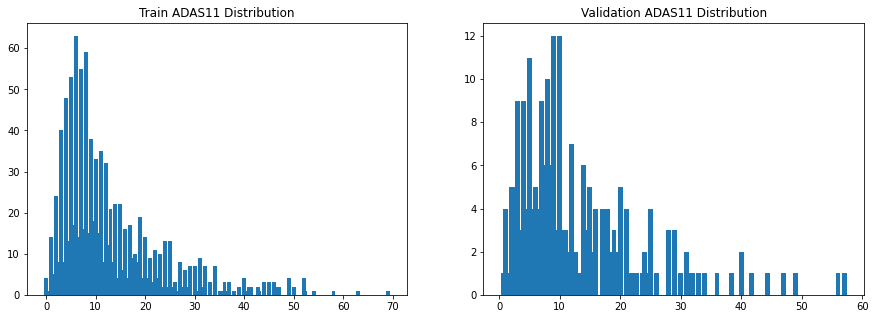

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[1].bar(pd.Series(y_adas_val).value_counts().keys(), pd.Series(y_adas_val).value_counts().values)
ax[1].set_title('Validation ADAS11 Distribution')
ax[0].bar(pd.Series(y_adas_train).value_counts().keys(), pd.Series(y_adas_train).value_counts().values)
ax[0].set_title('Train ADAS11 Distribution')
plt.show()